## Week 12


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

### 1). Solution of the Heat Equation

The heat equation describes the flow
of heat due to a temperature gradient. In 1 spatial dimension, this is
often written as: solution is governed by the same PDE that we have
been calling the heat equation,
$$\frac{\partial T(x,t)}{\partial t} = D\frac{\partial ^2 T(x, t)}{\partial x^2}$$
where $T (x, t)$ is the temperature at position $x$ at time $t$ , and $\alpha$ is the
thermal diffusivity (units $\frac{m^2}{s}$). If you take a system such as a metal
rod and heat one end relative to the other, heat will flow from the hot
end to the cold end till both ends reach the same temperature.



#### a) 10 pts
Solve the heat equation to estimate the equilibration
time for the following problem. A steel rod (thermal diffusivity
$D = 4.25 × 10^{−6} \frac{m^2}{s}$), of length $L = 10 cm$, has the left end
placed at temperature $T_1 = 100\degree$ C and the right end placed at
$T_2 = 200\degree$ C. The initial temperature of the rod is at a temperature
described by $T_i (x) = (200-1000x)\degree$ C, in SI units for $x$.A rough
estimate of the time for a diffusive system like this to equilibrate
is $t_0 = \frac{L^2}{D}$

For xih = 0.40, time step h = 9.4306e-04 s


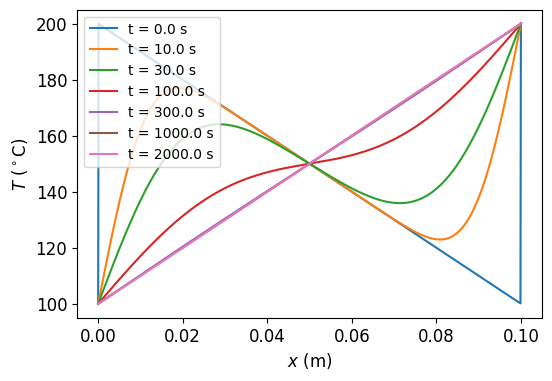

In [52]:
# Apply FTCS FD scheme to the heat equation with a custom initial condition.
# Solves for T(x,t) in a steel bar of length L with fixed temperatures at ends.
import numpy as np
import matplotlib.pyplot as plt

# Define physical system and boundary conditions:
L = 0.10                      # length of the bar (m)
D = 4.25e-6                   # thermal diffusivity (m^2/s) for steel
T_left = 100.0               # fixed temperature at left end (deg C)
T_right = 200.0              # fixed temperature at right end (deg C)

# FTCS parameters:
dx = 1000
xih = 0.4
tplot = [0, 10, 30, 100, 300, 1000, 2000]  # times at which to plot (s)

# Derived quantities:
x = np.linspace(0, L, dx)
a = x[1] - x[0]
h = xih * a**2 / D
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition and boundary conditions:
T = 200 - 1000 * x
T[0] = T_left
T[-1] = T_right

# FTCS update factor:
hda = h * D / a**2

# Time step function:
def step(T, hda):
    T[1:-1] += hda * (T[:-2] + T[2:] - 2 * T[1:-1])

# Determine time steps to plot:
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting:
plt.rc('font', size=12)
plt.figure(figsize=(6, 4))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$T$ ($^\circ$C)')

for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, T, label=f't = {j*h:.1f} s')
    step(T, hda)

plt.legend(fontsize=10)
plt.show()


(b) (5 points) Vary the time step h, and check if the algorithm is
numerically unstable when $h > \frac{a^2}{2D}$, where a is the spacing of
the grid points, and numerically stable for smaller values of h.

In [ ]:
print(a*a / 2*D)

For xih = 0.51, time step h = 1.2024e-03 s


/var/folders/wv/93tp0mvj0176s65wrdy9sffh0000gn/T/ipykernel_60244/264382256.py:34: RuntimeWarning: overflow encountered in subtract
  T[1:-1] += hda * (T[:-2] + T[2:] - 2 * T[1:-1])
/var/folders/wv/93tp0mvj0176s65wrdy9sffh0000gn/T/ipykernel_60244/264382256.py:34: RuntimeWarning: invalid value encountered in add
  T[1:-1] += hda * (T[:-2] + T[2:] - 2 * T[1:-1])


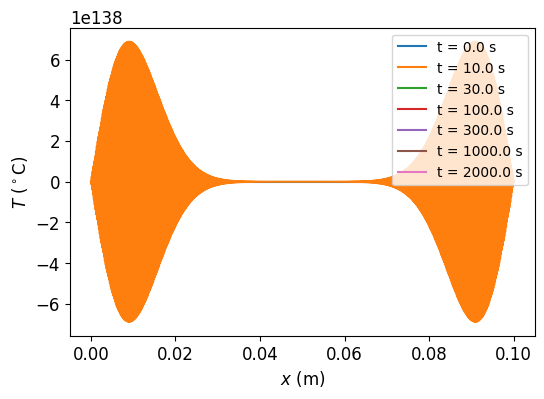

In [53]:
# Apply FTCS FD scheme to the heat equation with a custom initial condition.
# Solves for T(x,t) in a steel bar of length L with fixed temperatures at ends.
import numpy as np
import matplotlib.pyplot as plt

# Define physical system and boundary conditions:
L = 0.10                      # length of the bar (m)
D = 4.25e-6                   # thermal diffusivity (m^2/s) for steel
T_left = 100.0               # fixed temperature at left end (deg C)
T_right = 200.0              # fixed temperature at right end (deg C)

# FTCS parameters:
dx = 1000
xih = 0.51 
'''This is where I change it'''
tplot = [0, 10, 30, 100, 300, 1000, 2000]  # times at which to plot (s)

# Derived quantities:
x = np.linspace(0, L, dx)
a = x[1] - x[0]
h = xih * a**2 / D
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition and boundary conditions:
T = 200 - 1000 * x
T[0] = T_left
T[-1] = T_right

# FTCS update factor:
hda = h * D / a**2

# Time step function:
def step(T, hda):
    T[1:-1] += hda * (T[:-2] + T[2:] - 2 * T[1:-1])

# Determine time steps to plot:
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting:
plt.rc('font', size=12)
plt.figure(figsize=(6, 4))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$T$ ($^\circ$C)')

for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, T, label=f't = {j*h:.1f} s')
    step(T, hda)

plt.legend(fontsize=10)
plt.show()


(c) (5 points) Double the number of space points and check that the
same condition on numerical stability holds.

For xih = 0.40, time step h = 2.3553e-04 s


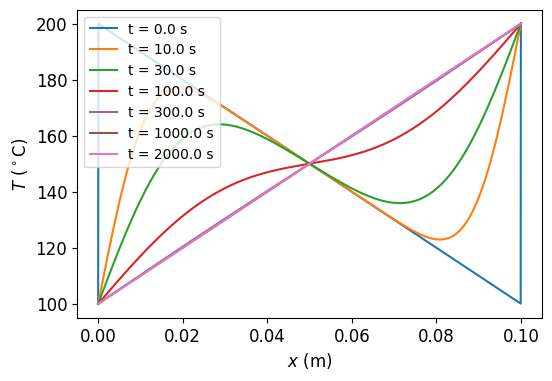

In [55]:
xih = 0.4
dx=1000
dx*=2
# Derived quantities:
x = np.linspace(0, L, dx)
a = x[1] - x[0]
h = xih * a**2 / D
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition and boundary conditions:
T = 200 - 1000 * x
T[0] = T_left
T[-1] = T_right

# FTCS update factor:
hda = h * D / a**2

# Time step function:
def step(T, hda):
    T[1:-1] += hda * (T[:-2] + T[2:] - 2 * T[1:-1])

# Determine time steps to plot:
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting:
plt.rc('font', size=12)
plt.figure(figsize=(6, 4))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$T$ ($^\circ$C)')

for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, T, label=f't = {j*h:.1f} s')
    step(T, hda)

plt.legend(fontsize=10)
plt.show()


### 2. Diffusion of a tracer (30 pts) 
The variation in space and time due to diﬀusion
of the concentration C(x,t) of a tracer like a dye in solution is governed
by the same PDE that we have been calling the heat equation,
$$\frac{\partial C(x,t)}{\partial t} = D\frac{\partial ^2 C(x, t)}{\partial x^2}$$
where D is the diﬀusion coeﬃcient. D= 1.6 ×10−9 m2/s for water.
Consider a narrow tube filled with water extending from x=−L/2 to
x = L/2 where L = 1.0 mm. At t = 0, the concentration of a tracer
that diﬀuses according to the equation above is given by
C(x,0) = C0 if |x|<x0,
0 otherwise.
Here C0 and x0 are constants describing the inital conditions. The ends
of the tube are connected to large reservoirs of water with C = 0, so
the boundary conditions are C(−L/2,t) = C(L/2,t) = 0 for all t.

(a) (20 points) Consider inital conditions x0 = 50 µm, C0 = 100 ppm
(parts per million). This describes a narrow, square “spike” of
tracer at the center of the tube. Use the FTCS algorithm to
compute and plot C(x) at 10 diﬀerent times, staring with t = 0
and choosing points in the range t ≪ t0 to t ≈ t0). Except
for very short and very long times, you should find that C(x) is
approximately a Gaussian – this is a general characteristic of
diﬀusive systems.
Show that the characteristic equilibration time grows as t0 =
L2/D for this system of size L

For xih = 0.40, time step h = 2.5050e-04 s


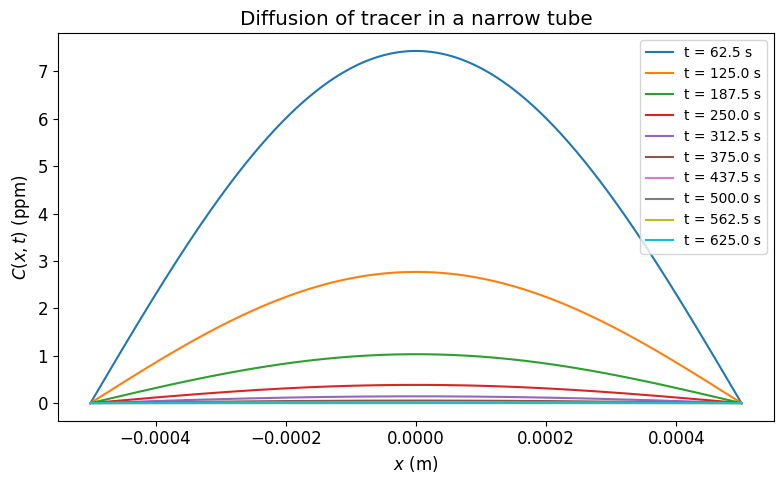

In [44]:
# Define physical system and boundary conditions
L = 0.001                  # Length of the bar (m)
D = 1.6e-9                 # Diffusion coefficient (m^2/s)
C_left = 0.0               # Concentration at left boundary (ppm)
C_right = 0.0              # Concentration at right boundary (ppm)
x0 = 50e-6                 # Width of initial spike (m)
C0 = 100.0                 # Initial concentration inside spike (ppm)
t0 = L**2 / D              # Characteristic diffusion time (s)

# FTCS parameters
dx = 1000                                # Number of spatial grid points
xih = 0.4                                # Dimensionless parameter D*h/dx^2
x = np.linspace(-L/2, L/2, dx)           # Spatial grid
a = x[1] - x[0]                          # Spatial step size
h = xih * a**2 / D                       # Time step from xih
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition
C = np.zeros_like(x)
C[np.abs(x) < x0] = C0
C[0] = C_left
C[-1] = C_right

# FTCS update factor
hda = h * D / a**2

# Time steps at which to plot
tplot = np.linspace(t0/10, t0, 10)
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting setup
plt.figure(figsize=(8, 5))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$C(x,t)$ (ppm)')
plt.title('Diffusion of tracer in a narrow tube')

# Time evolution loop
for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, C.copy(), label=f't = {j*h:.1f} s')
    # FTCS update step
    C[1:-1] += hda * (C[:-2] + C[2:] - 2 * C[1:-1])
    C[0] = C_left
    C[-1] = C_right

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


For xih = 0.40, time step h = 6.2625e-03 s


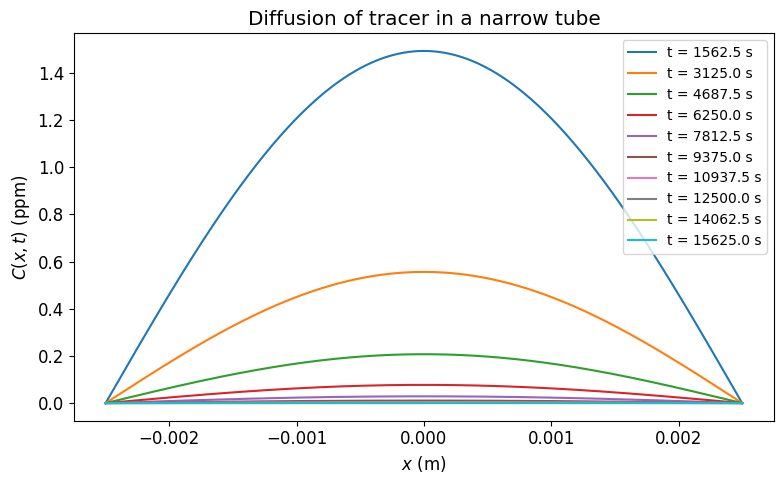

In [47]:
# Define physical system and boundary conditions
L = 0.005                  # Length of the bar (m)
D = 1.6e-9                 # Diffusion coefficient (m^2/s)
C_left = 0.0               # Concentration at left boundary (ppm)
C_right = 0.0              # Concentration at right boundary (ppm)
x0 = 50e-6                 # Width of initial spike (m)
C0 = 100.0                 # Initial concentration inside spike (ppm)
t0 = L**2 / D              # Characteristic diffusion time (s)

# FTCS parameters
dx = 1000                                # Number of spatial grid points
xih = 0.4                                # Dimensionless parameter D*h/dx^2
x = np.linspace(-L/2, L/2, dx)           # Spatial grid
a = x[1] - x[0]                          # Spatial step size
h = xih * a**2 / D                       # Time step from xih
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition
C = np.zeros_like(x)
C[np.abs(x) < x0] = C0
C[0] = C_left
C[-1] = C_right

# FTCS update factor
hda = h * D / a**2

# Time steps at which to plot
tplot = np.linspace(t0/10, t0, 10)
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting setup
plt.figure(figsize=(8, 5))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$C(x,t)$ (ppm)')
plt.title('Diffusion of tracer in a narrow tube')


# Time evolution loop
for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, C.copy(), label=f't = {j*h:.1f} s')
    # FTCS update step
    C[1:-1] += hda * (C[:-2] + C[2:] - 2 * C[1:-1])
    C[0] = C_left
    C[-1] = C_right

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

(b) (10 points) Repeat your calculations with diﬀerent initial con-
ditions x0 = 250 µm, C0 = 10 ppm – a much broader square
distribution. Show that at long times t>t0, the area under the
C(x) curve, which gives the total amount of tracer in the tube,
is decreasing towards zero. This is because the ends of the tube
are connected to reservoirs with C = 0, and the tracer is free to
diﬀuse out of the tube into these reservoirs.

For xih = 0.40, time step h = 6.2625e-03 s


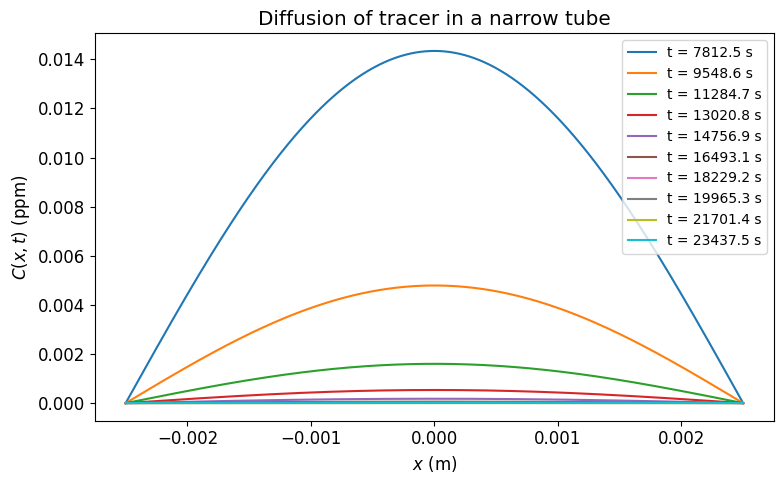

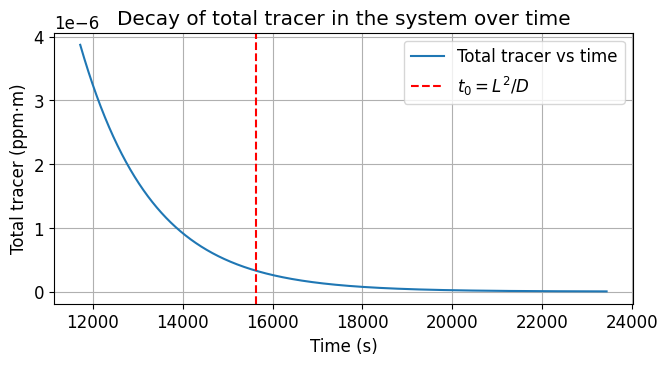

In [51]:
# Define physical system and boundary conditions
L = 0.005                  # Length of the bar (m)
D = 1.6e-9                 # Diffusion coefficient (m^2/s)
C_left = 0.0               # Concentration at left boundary (ppm)
C_right = 0.0              # Concentration at right boundary (ppm)
x0 = 250e-6                 # Width of initial spike (m)
C0 = 10.0                 # Initial concentration inside spike (ppm)
t0 = L**2 / D              # Characteristic diffusion time (s)

# FTCS parameters
dx = 1000                                # Number of spatial grid points
xih = 0.4                                # Dimensionless parameter D*h/dx^2
x = np.linspace(-L/2, L/2, dx)           # Spatial grid
a = x[1] - x[0]                          # Spatial step size
h = xih * a**2 / D                       # Time step from xih
print(f'For xih = {xih:.2f}, time step h = {h:.4e} s')

# Initial condition
C = np.zeros_like(x)
C[np.abs(x) < x0] = C0
C[0] = C_left
C[-1] = C_right

# FTCS update factor
hda = h * D / a**2

# Time steps at which to plot
tplot = np.linspace(0.5*t0, 1.5*t0, 10)
jplot = [int(t / h + 0.5) for t in tplot]

# Plotting setup
plt.figure(figsize=(8, 5))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$C(x,t)$ (ppm)')
plt.title('Diffusion of tracer in a narrow tube')

total_tracer_history = []
time_history = []

for j in range(max(jplot) + 1):
    if j in jplot:
        plt.plot(x, C.copy(), label=f't = {j*h:.1f} s')
    # FTCS update step
    C[1:-1] += hda * (C[:-2] + C[2:] - 2 * C[1:-1])
    C[0] = C_left
    C[-1] = C_right

    # Track area under curve
    total_tracer_history.append(np.sum(C) * a)
    time_history.append(j * h)

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Plot total tracer vs. time
plt.figure(figsize=(7, 4))
plt.plot(time_history[int(3742505/2):], total_tracer_history[int(3742505/2):], label='Total tracer vs time')
plt.axvline(t0, color='r', linestyle='--', label=r'$t_0 = L^2/D$')
plt.xlabel('Time (s)')
plt.ylabel('Total tracer (ppm·m)')
plt.title('Decay of total tracer in the system over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
